# Geometry-Inspired Control of the Brockett-Integrator in Cylindrical Coordinates

This Notebook documents the important calculations for the conference contribution entitled "Geometry-Inspired Control of the Brockett-Integrator in Cylinder Coordinates" presented at the GAMM annual meeting 2018.



Dieses Notebook investigates the Brockett-Integrator


\begin{align}
%\label{eq_}
\dot x_1 &= u_1\\
\dot x_2 &= u_2\\
\dot x_3 &= x_2 u_1 - x_1 u_2
\end{align}




In [1]:
import time
time.ctime()

'Tue Jul  3 14:24:03 2018'

### Technical Dependencies:


https://github.com/TUD-RST/symbtools

https://github.com/cknoll/ipydex (for displaytools)
'

In [2]:
%load_ext ipydex.displaytools

import sympy as sp
from sympy import sin, cos, exp
import numpy as np
import scipy as sc
import scipy.integrate
import scipy.interpolate
import matplotlib.pyplot as plt
%matplotlib inline

import symbtools as st
from sympy.interactive import printing
printing.init_printing(1)


plt.rc('text.latex', preamble=r'\usepackage{amsmath}') # for \text{..}
plt.rcParams['text.usetex'] = True

plt.rcParams['figure.subplot.bottom'] = .3
plt.rcParams['figure.subplot.left'] = .21
plt.rcParams['figure.subplot.top'] = .98
plt.rcParams['figure.subplot.right'] = .98

plt.rcParams['figure.subplot.hspace'] = .5 # vertical distance
plt.rcParams['figure.subplot.wspace'] = .5 # horizontal distance

plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14


In [3]:
xx = st.symb_vector("x1:4")
uu = st.symb_vector("u1:3")
zz = st.symb_vector("z1:4")
vv = st.symb_vector("v1:3")
st.make_global(xx, uu, zz, vv)

### Can the system be transformed to the *regular Form* (Khalil p. 564)?
→ Investigation of involutivity.

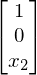

---


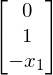

---


In [4]:
b1 = sp.Matrix([1, 0, x2]) ##:
b2 = sp.Matrix([0, 1, -x1]) ##:
B = st.col_stack(b1, b2)

Involutivitäts-Test

In [5]:
st.involutivity_test(B, xx)

(False, (0, 1))

→ not involutive.


This can also be seen directly:

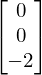

---


In [6]:
ad_b1_b2 = st.lie_bracket(b1, b2, xx) ##

Thus the Lie-Algebra-Rank-Condition obviously is fulfilled:

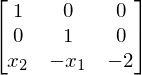

---


In [7]:
test_matrix = st.col_stack(b1, b2, ad_b1_b2) ##:
st.generic_rank(test_matrix)

### Derivation of a switiching control law, which renders the origin globally asymptotically stable
 * based on a representation in cylindrical coordinates

Reminder: original coordinate representation:

$
\begin{align}
%\label{eq_}
\dot x_1 &= u_1\\
\dot x_2 &= u_2\\
\dot x_3 &= x_2 u_1 - x_1 u_2
\end{align}
$

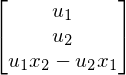

---


In [8]:
ff = B*uu ##:

### Systemdynamics in cylindrical coordinates


\begin{align}
%\label{eq_}
r &= z_1 =  \sqrt{x_1^2 + x_2^2} \\
\varphi &= z_2 = \mathrm{arctan2}(x_2, x_1) \\
z &= z_3 = x_3
\end{align}


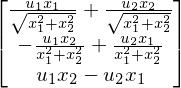

---


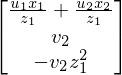

---


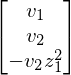

---


In [9]:
z1e = sp.sqrt(x1**2 + x2**2)
z2e = sp.atan2(x2, x1)
z3e = x3

zz_expr = sp.Matrix([z1e, z2e, z3e])

rplm1 = [(z1e, z1), (sp.expand(-ff[2]/z1**2), v2), (ff[2], -z1**2*v2)]

ffz = zz_expr.jacobian(xx)*ff ##:
ffz = ffz.subs(rplm1) ##:
rplm2 = [(ffz[0], v1)]
ffz = ffz.subs(rplm2) ##:


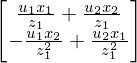

---


In [10]:
vve = vv.subs(st.rev_tuple(rplm1+rplm2)) ##:


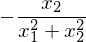

In [11]:
z2e.diff(x1)

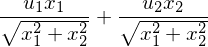

___


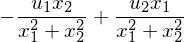

___


In [12]:
st.lie_deriv(z1e, ff, xx) ##:
st.lie_deriv(z2e, ff, xx) ##:

backward transformation of the input

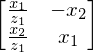

___


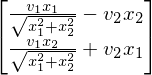

---


In [13]:
M = vve.jacobian(uu).inverse_ADJ()
M.simplify()
M.subs(rplm1) ##:

# uue = M.subs(rplm1) * vv ##:

uue = M.subs(st.rev_tuple(rplm1[:1])) * vv ##:

In [14]:
# check
vve.subz(uu, uue).smplf.subs(st.rev_tuple(rplm1[:1]))

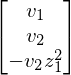

In [15]:
ffz

### Construction of the shortest possible curve (of a given type) from the z3-axis to the origin

Three stages:
1. increase $z_1$ → $r_1$
2. with $v_2=$const perform a helical motion upward/downward (change $z_2$ and $z_3$, until $z_3=0$)
3. decrease $z_1$


\begin{align}
%\label{eq_}
L &= r_1 + \int_0^T \sqrt{\dot x_1^2 +  \dot x_2^2 + \dot x_3^2 }\, dt + r_1\\
&= r_1 + \int_0^T \sqrt{(r_1 \dot z_2)^2 + \dot z_3^2 }\, dt + r_1\\
&= 2 r_1 + \int_0^T \sqrt{  (r_1 v_2)^2 + r_1^4 v_2^2}\, dt \\
&= 2 r_1 + (r_1 |v_2|)\sqrt{( 1+ r_1^2)} \int_0^T \, dt \\
&= 2 r_1 + (r_1 |v_2|)\sqrt{( 1+ r_1^2)}T \\
\end{align}


From the system dynamics we have:

$$
\Delta z_3 = - T r_1^2 v_2,
$$
where we require $T \geq 0$ and thus the input $v_2$ must be chosen such that $\mathrm{sign}(v_2) = \mathrm{sign}(\Delta z_3)$. As a consequence, we get

$$
\quad T = - \frac{\Delta  z_3 }{r_1^2 v_2} = \frac{|\Delta  z_3 |}{r_1^2 |v_2|}
$$

<br>

$
\Rightarrow L= 2 r_1 + (r_1 |v_2|)\sqrt{( 1+ r_1^2)} \cdot \frac{|\Delta  z_3| }{r_1^2 |v_2|}
$

In [16]:

r1, dz3 = sp.symbols('r1, \Delta{}z_3', positive=True) ##

---


Formula for the length of the curve in dependence of $\Delta z_3$ and $r_1$

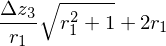

---


In [17]:
Le = sp.expand(2*r1+(r1*v2)*sp.sqrt(1+r1**2)*dz3/r1**2/v2) ##:

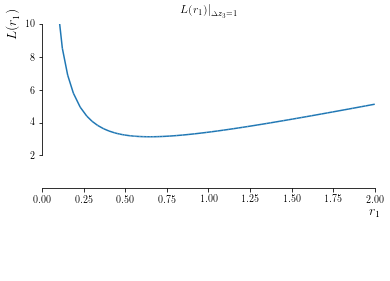

In [18]:
sp.plot(Le.subs(dz3, 1), (r1, 0, 2), ylim=(-5, 10), xlabel="$r_1$", ylabel="$L(r_1)$", title= r"$\left. L(r_1)\right|_{\Delta{}z_3 = 1}$")

To determine the minimum of this length we calculate the derivative...

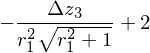

---


In [19]:
Led = Le.diff(r1).smplf ##:

... and set it to $0$. This is simplified by the substitution $x:= r_1^2$.

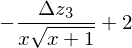

---


In [20]:
# manual solution (biquadratic equation)
x = sp.Symbol("x")
Ledx = Led.subs(r1**2, x) ##:

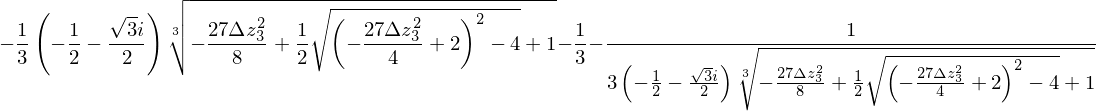

--------------------


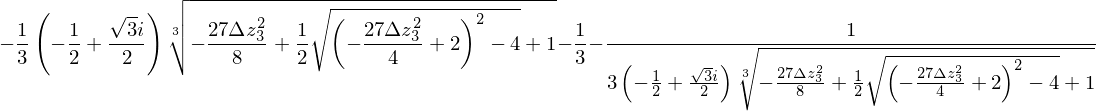

--------------------


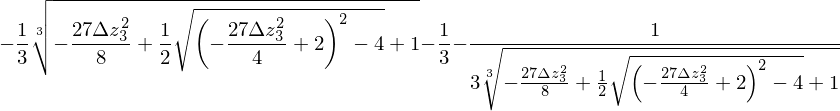

In [21]:
sol1, sol2, sol3 = sp.solve(Ledx, x)

display(sol1)
print("-"*20)
display(sol2)
print("-"*20)
display(sol3)


This means: three solutions for $x = r_1^2$ and thus six solutions for $r_1$

Different method to calculate (use $r_1$ directly):

In [22]:
sol = sp.solve(Le.diff(r1), r1)

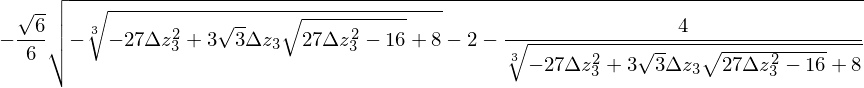

--------------------


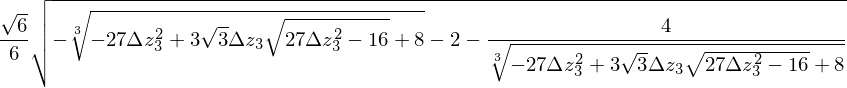

--------------------


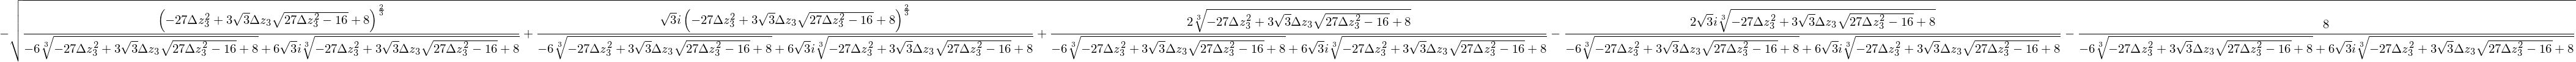

In [23]:
display(sol[0])
print("-"*20)
display(sol[1])
print("-"*20)
display(sol[2])

Evaluate the symbolical solution for $\Delta z_3 =1$

In [24]:
len(sol) ##:

for i, s in enumerate(sol):
    print(i + 1, s.subs(dz3, 1).evalf())

___
1 -0.176100564369479 - 0.860716618623568*I
2 0.176100564369479 + 0.860716618623568*I
3 -0.647798871261042 - 4.67618288267623e-27*I
4 0.647798871261042 + 0.e-25*I
5 -0.176100564369479 + 0.860716618623568*I
6 0.176100564369479 - 0.860716618623568*I


$\rightarrow$ we get one positive real solution.

This is consistent with the picture above: one minimum at $r_1 \approx 0.65$

In [25]:
# Define a function wich for every r1-value always selects the real positive solution

def r1_opt(dz3_value):
    results = [s.subs(dz3, dz3_value).evalf() for s in sol]
    
    results.sort(key=lambda x: abs(sp.im(x)))
    
    r1 = sp.re(results[0])
    if r1 < 0:
        r1 = sp.re(results[1])
    assert r1 >= 0
    return r1

# test
for p in [0.01, .1, 1, 10]:
    print(r1_opt(p))

0.0706227831905930
0.220957890360505
0.647798871261042
1.62044085898296


In [26]:
# Speedup the evaluation later (prepare values for interpolation)
zz3 = np.logspace(-3, 3, 100)

rr_opt = [r1_opt(z3_value) for z3_value in zz3]
r1_opt_interp = sc.interpolate.interp1d(zz3, rr_opt, bounds_error=False, fill_value="extrapolate")

#### optimal value of $r_1$ in dependence of  $\Delta z_3$

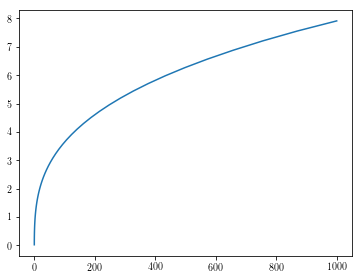

In [27]:
plt.plot(zz3, r1_opt_interp(zz3))

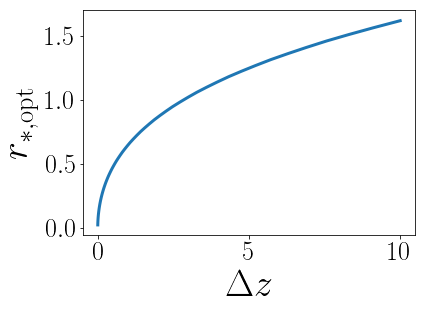

In [28]:
# produce figrue for the slides/paper

plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 38
plt.rcParams['figure.subplot.bottom'] = .2

zz3 = np.logspace(-3, 1, 100)
plt.plot(zz3, r1_opt_interp(zz3), lw=3)
plt.xlabel(r"$\Delta z$")
plt.ylabel(r"$r_{*,\mathrm{opt}}$")
plt.savefig("r_opt__Delta_z.pdf")

In [29]:
# check a sample

r1_opt_interp(.7) ##:
r1_opt(.7) ##:
r1_opt_interp(.7)- r1_opt(.7)##:


r1_opt_interp(.7)  := array(0.5533069892183082)

___


___


___


### Simulation Experiments

#### Auxiliary functions

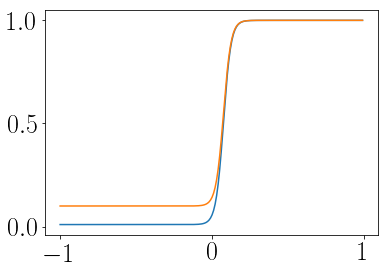

In [30]:
def sigmoid(xmin, xmax, x, slope=40):
    """
    smoothly map x to the range (xmin, xmax)
    
    This is used to scale the input signals near if the tolerance is near (to avoid sliding modes)
    """
    assert xmax > xmin
    dx = xmax - xmin
    
    res = xmax - dx/(1+ .05*np.exp(slope*x))
    return res

xx = np.arange(-1,1, .01)
plt.plot(xx, sigmoid(.01, 1, xx,))
plt.plot(xx, sigmoid(.1, 1, xx))

In [31]:

def cont_continuation(x, stephight=2*np.pi, threshold=.01):
    """
    continuous continuation (for 1d-arrays)

    x           .... data


    stephight   ... the expected stephight (e.g 2*pi)

    threshold   .... smallest difference which is considered as a discontinuity
                    which has to be corrected
                    (must be greater than the Lipschitz-Const. of the signal
                     times dt)

    """
    x_d = np.concatenate(  ([0], np.diff(x))  )
    corrector_array = np.sign(x_d) * (np.abs(x_d) > threshold)
    corrector_array = np.cumsum(corrector_array) * -stephight

    return x + corrector_array

#### Vector Field of the Brocket-Integrator in original coordinates

In [32]:
def rhs(state, _):
    u1, u2 = controller(state)
    x1, x2, x3 = state
    return np.array([u1, u2, x2*u1 - x1*u2])

vv_to_uu = sp.lambdify((v1, v2, x1, x2), list(uue))
z_tol = 1e-2
r_tol = 1e-2


#### Control Law

In [33]:
def controller(state):
    x1, x2, x3 = state
    r = np.sqrt(x1**2 + x2**2)
    z = x3
    r_opt_value = r1_opt_interp(abs(z))
    
    if r == 0:
        # go in x1 direction if phi is not well definded (at r=0)
        return [1, 0]
    
    if r < r_opt_value and abs(z) >= z_tol:
        # Stage 1
        v1 = 1
        v2 = 0
    elif r >= r_opt_value and abs(z) >= z_tol:
        # Stage 2
        v1 = 0
        v2 = np.sign(z)*sigmoid(.05, 1, abs(z-z_tol))
    elif abs(z) < z_tol:
        # Stage 3
        v1 = -1
        v2 = 0
        
    if abs(z) < z_tol and r < r_tol:
        # detection of desired state
        v1 = 0
        
    # calculate u1, u2, from v1, v2
    return vv_to_uu(v1, v2, x1, x2)

#### Euler-forward method for integration

In [34]:
def euler(rhs, y0, T, dt=.01):
    res=[y0]
    tt=[0]
    while tt[-1] <= T:
        x_old = res[-1]
        res.append(x_old+dt*rhs(x_old, 0))
        tt.append(tt[-1] + dt)
    return tt, np.array(res)
    
    

In [35]:
Tend = 6
dt = .005
def simulate(xx0):
    tt, xxn = euler(rhs, xx0, Tend, dt=dt)
    return np.array(xxn)

In [36]:
N = 20
np.random.seed(3)

# initial values: x1, x2 uniformly random in (-1, 1)
# x3 in (0, 1)
xx0_values = np.column_stack( ((np.random.rand(N, 2) - .5), np.random.rand(N, 1)))

res = [simulate(xx0) for xx0 in xx0_values]

# swap some of the results, such that 3d view looks nicer
res[0], res[1] = res[1], res[0]

tt = np.arange(0, Tend+2*dt, dt)[:res[0].shape[0]]

[Text(0,0,''), Text(0,0,'$\\phantom{-}0.0$'), Text(0,0.5,'$0.5$'), Text(0,0,'')]


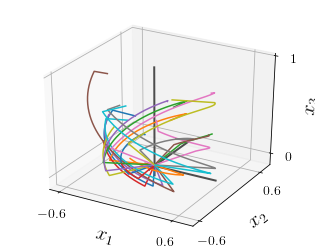

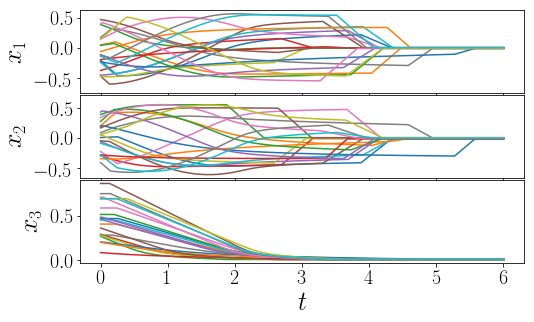

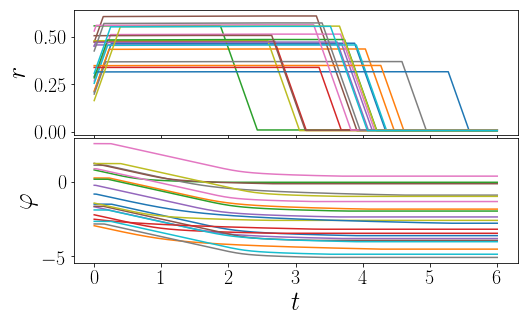

In [37]:
# Interactive plot window
# %matplotlib qt5

# alternatively: embedded images
%matplotlib inline

plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.subplot.bottom'] = .2

plt.rcParams['figure.subplot.left'] = .05
plt.rcParams['figure.subplot.right'] = .9

fig_3d = plt.figure(1, figsize=(4.8, 4.1))
ax0 = fig_3d.gca(projection='3d')
# plot axis

kwargs1 = dict(color="0.3", ls="solid", lw=2)

# plot coordinate system
ax0.plot([-.1, .65], [0, 0], [0, 0], **kwargs1)
ax0.plot([0, 0], [-.1, .65], [0, 0], **kwargs1)
ax0.plot([0, 0], [0, 0], [-.1, 1], **kwargs1)

ax0.set_xlabel("$x_1$")
ax0.set_xticks([-.6, .6])
ax0.set_ylabel("$x_2$")
ax0.set_yticks([-.6, .6])
ax0.set_zlabel("$x_3$")
ax0.set_zticks([0, 1])


plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['figure.subplot.left'] = .2
plt.rcParams['figure.subplot.right'] = .98

plt.rcParams['figure.subplot.hspace'] = 0.02

fs = (7.9, 4.5)

fig_xx = plt.figure(2, figsize=fs)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

fig_rphi = plt.figure(3, figsize=fs)

ax4 = plt.subplot(211)
ax5 = plt.subplot(212)

ax1.set_ylabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax3.set_ylabel("$x_3$")
ax3.set_xlabel("$t$")

ax4.set_ylabel("$r$")
ax5.set_ylabel(r"$\varphi$")
ax5.set_xlabel("$t$")

# preset zoom such that the axes will not flicker
ax0.axis([-0.68, 0.78, -0.69, .78])
ax1.axis([-0.3, 6.31, -0.76, 0.63])
ax2.axis([-0.3, 6.31, -0.67, 0.72])
ax3.axis([-0.3, 6.31, -0.03, 0.9])
ax4.axis([-0.3, 6.31, -0.02, 0.64])
ax5.axis([-0.3, 6.31, -5.48, 2.93])


for i, xxn in enumerate(res):
    r = np.sqrt(xxn[:, 0]**2 + xxn[:, 1]**2)
    phi_ = np.arctan2(xxn[:, 0], xxn[:, 1])
    phi = cont_continuation(phi_)
    z = xxn[:, 2]
    
    ax0.plot(xxn[:, 0], xxn[:, 1], xxn[:, 2])
    ax1.plot(tt, xxn[:, 0])
    ax2.plot(tt, xxn[:, 1])
    ax3.plot(tt, xxn[:, 2])
    
    ax4.plot(tt, r)
    ax5.plot(tt, phi)
    
    if i in [0, 4, N-1]:
    #if i in [0]:

        fig_3d.savefig("bi-3d-{:02d}.pdf".format(i+1))
        fig_xx.savefig("bi-xx-{:02d}.pdf".format(i+1))
        fig_rphi.savefig("bi-rphi-{:02d}.pdf".format(i+1))
        # break

        
ax1.set_xticklabels([""]*4)
ax2.set_xticklabels([""]*4)
# adjust y_label for x3
l  = list(ax3.get_yticklabels())
l[1].set_text("$\phantom{-}0.0$")
print(l)
ax3.set_yticklabels(l)


plt.show()
